<a href="https://colab.research.google.com/github/Niha002/AI-class/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from pandas import Timestamp
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
import plotly.express as ex
import plotly.express as px

import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
import itertools
import matplotlib.gridspec as gridspec 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from tensorflow.keras.optimizers import Adam 


import warnings
warnings.filterwarnings(action='ignore')    

%matplotlib inline


In [ ]:
# Exploring dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

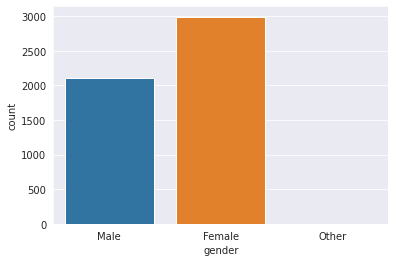

In [ ]:
# Exploring parameters
import seaborn as sns
sns.countplot(df['gender'])
df['gender'].value_counts()
# Male < Female

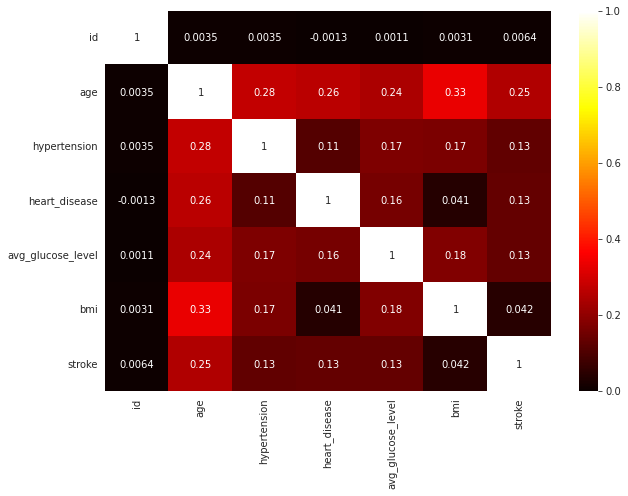

In [ ]:
# Correlation using heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
corrmat = df.corr()
sns.heatmap(data=corrmat,annot=True, cmap="hot")
# High corr between bmi and age
# Categorical features 

In [ ]:
# Data Cleaning 
# Coding Categorical Features into Binary
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,NaN,1,0,0,1,0,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,0,1,0,0
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,0,1,0


In [ ]:
# Handling o
df.isnull().sum()
# Only BMI present 0
choices = np.arange(min(df['bmi']),max(df['bmi']))
choices
#let's fill with random choice
df['bmi'] = df['bmi'].apply(lambda x: np.random.choice(choices) if (np.isnan(x)) else x)

KeyError: ignored

In [ ]:
# Check Nan
df.isnull().sum()

id                                0
gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
dtype: int64

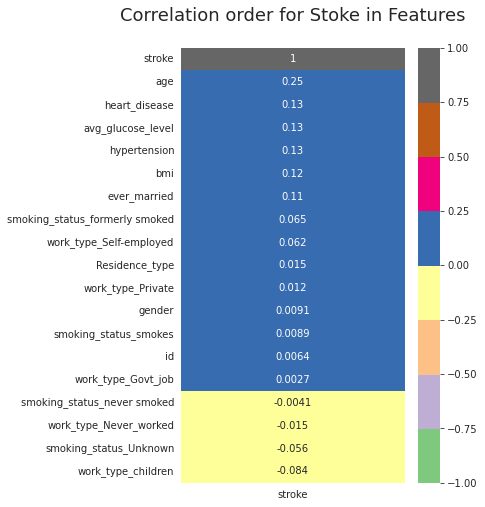

In [ ]:
# Correlation with our target
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(df.corr()[['stroke']].sort_values(
    by='stroke',ascending=False),
                      vmin=-1, vmax=1, annot=True,
                      cmap = 'Accent')
plt.title('Correlation order for Stoke in Features\n', loc='center', fontsize=18);
plt.show()
# Age is highly corelated to target 

In [ ]:
# Preprocessing 
from sklearn.preprocessing import RobustScaler,StandardScaler

rob_scaler = StandardScaler()
df['scal_age'] = rob_scaler.fit_transform(df['age'].values.reshape(-1,1))
df['scal_avg_glucose_level'] = rob_scaler.fit_transform(df['avg_glucose_level'].values.reshape(-1,1))
df['scal_bmi'] = rob_scaler.fit_transform(df['bmi'].values.reshape(-1,1))

df=df.drop(columns=['bmi','avg_glucose_level','age'],axis=1)
df

,id,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,scal_age,scal_avg_glucose_level,scal_bmi
0,9046,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,1.051434,2.706375,0.637520
1,51676,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0.786070,2.121559,2.991095
2,31112,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1.626390,-0.005028,0.246846
3,60182,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0.255342,1.437358,0.427890
4,1665,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1.582163,1.501184,-0.563089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1.626390,-0.494658,-0.534503
5106,44873,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1.670617,0.420775,0.961494
5107,19723,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-0.363842,-0.511443,0.065802
5108,37544,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0.343796,1.328257,-0.410630


In [ ]:
# modeling & evaluation
X_org = df.drop('stroke', axis=1)
y_org = df['stroke']

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X_org, y_org):
    #print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X_org.iloc[train_index], X_org.iloc[test_index]
    original_ytrain, original_ytest = y_org.iloc[train_index], y_org.iloc[test_index]
    

#convert train and test sets into arrays  
    
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

DNN

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


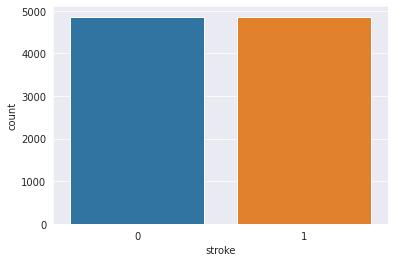

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)

# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(X_org, y_org )

# we have balanced class now
y = pd.DataFrame({'stroke':ysm_train})
sns.countplot(data = y, x = 'stroke', y= None)
plt.show()

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(Xsm_train, ysm_train, test_size = 0.3, random_state = 0)

In [ ]:
n_inputs = train_x.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
from keras.metrics import categorical_crossentropy

oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
oversample_model.fit(train_x, train_y, validation_split=0.2, batch_size=200, epochs=500, shuffle=True, verbose=2)

Epoch 1/500
32/32 - 0s - loss: 7.0873 - accuracy: 0.5301 - val_loss: 0.9684 - val_accuracy: 0.6266 - 133ms/epoch - 4ms/step
Epoch 2/500
32/32 - 0s - loss: 12.4973 - accuracy: 0.5271 - val_loss: 7.5927 - val_accuracy: 0.5090 - 93ms/epoch - 3ms/step
Epoch 3/500
32/32 - 0s - loss: 8.8926 - accuracy: 0.5435 - val_loss: 19.2887 - val_accuracy: 0.4981 - 95ms/epoch - 3ms/step
Epoch 4/500
32/32 - 0s - loss: 15.4331 - accuracy: 0.5300 - val_loss: 4.3309 - val_accuracy: 0.5392 - 84ms/epoch - 3ms/step
Epoch 5/500
32/32 - 0s - loss: 21.3803 - accuracy: 0.5046 - val_loss: 25.4386 - val_accuracy: 0.5084 - 84ms/epoch - 3ms/step
Epoch 6/500
32/32 - 0s - loss: 8.1890 - accuracy: 0.5501 - val_loss: 9.4649 - val_accuracy: 0.5238 - 94ms/epoch - 3ms/step
Epoch 7/500
32/32 - 0s - loss: 10.7500 - accuracy: 0.5570 - val_loss: 27.1649 - val_accuracy: 0.4987 - 85ms/epoch - 3ms/step
Epoch 8/500
32/32 - 0s - loss: 14.7442 - accuracy: 0.5414 - val_loss: 9.3373 - val_accuracy: 0.5238 - 96ms/epoch - 3ms/step
Epoch 9

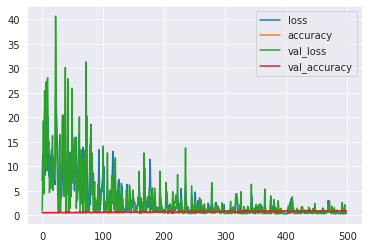

In [ ]:
model_loss = pd.DataFrame(oversample_model.history.history)
model_loss.plot()

In [ ]:
# EVALUATION
train_scores = oversample_model.evaluate(train_x, train_y)
test_scores = oversample_model.evaluate(test_x, test_y)
print(f"Test Accuracy (on train dataset): {train_scores[1]*100}")
print(f"Test Accuracy (on test dataset): {test_scores[1]*100}")

61/61 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.8746
Test Accuracy (on train dataset): 87.10299730300903
Test Accuracy (on test dataset): 87.45501041412354


In [ ]:
oversample_predictions = oversample_model.predict(test_x)
classes_x=np.argmax(oversample_predictions,axis=1)

61/61 [==============================] - 0s 1ms/step


In [ ]:
# let's see confusion matrix
def plot_cm(y_true, y_pred, title):
    figsize=(10,10)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGn", annot=annot, fmt='', ax=ax)

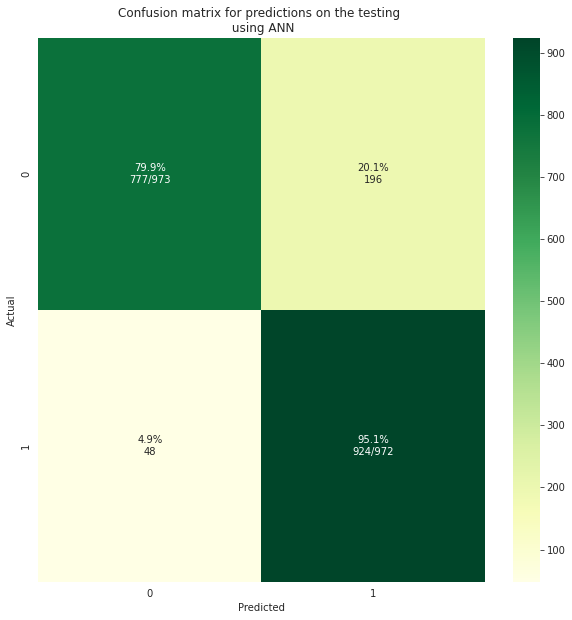

In [ ]:
plot_cm(test_y, classes_x, "Confusion matrix for predictions on the testing \n using ANN")

In [ ]:
oversample_predictions = oversample_model.predict(test_x)
classes_x=np.argmax(oversample_predictions,axis=1)
print(classification_report(test_y, classes_x))

61/61 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       973
           1       0.82      0.95      0.88       972

    accuracy                           0.87      1945
   macro avg       0.88      0.87      0.87      1945
weighted avg       0.88      0.87      0.87      1945



In [ ]:
!pwd

/content
